# 라이브러리

In [1]:
from google.colab import drive
import os
import json
from tqdm import tqdm
import shutil
import re
from glob import glob
from google.colab import files


# 데이터셋 다운로드

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/framework/yolov5
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
#yolov5 모델 다운로드
#!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
# !pip install -r requirements.txt

In [ ]:
import yaml
import torch
from IPython.display import Image, clear_output

In [ ]:
#%mkdir /content/drive/MyDrive/trash/yolov5/
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
# %mkdir ./img
# %mkdir ./label

# **데이터 셋 준비**


In [ ]:
from glob import glob

train_img_lst = glob('/content/drive/MyDrive/framework/images/*.jpg')


with open('/content/drive/MyDrive/framework/train.txt','w') as f:
  f.write('\n'.join(train_img_lst)+'\n')

In [ ]:
print(len(train_img_lst))

10476


In [ ]:
train_txt_lst = glob('/content/drive/MyDrive/framework/labels/*.txt')
print(len(train_txt_lst))

10476


In [ ]:
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/data.yaml

train: /content/drive/MyDrive/framework/images
val: /content/drive/MyDrive/framework/images
nc: 2
names: ['face','yong']

In [ ]:
# %%writetemplate /content/drive/MyDrive/framework/data.yaml

# train: C:/Users/Junseok/Desktop/9.21Project/images
# val: C:/Users/Junseok/Desktop/9.21Project/images

# nc: 2
# names: ['face','yong']

In [ ]:
%cat /content/drive/MyDrive/framework/data.yaml


train: /content/drive/MyDrive/framework/images
val: /content/drive/MyDrive/framework/images
nc: 2
names: ['face','yong']


In [ ]:
import yaml

with open('/content/drive/MyDrive/framework/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

  print(num_classes)

2


In [ ]:
!cat /content/drive/MyDrive/framework/yolov5/models/yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]], 

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/yolov5/models/custom_yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/drive/MyDrive/framework/yolov5/models/custom_yolov5l.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# %cd yolov5
!pwd

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [ ]:
# 데이터 학습
!python train.py --img 620 --batch 512 --epochs 200 --data /content/drive/MyDrive/framework/data.yaml --cfg /content/drive/MyDrive/framework/yolov5/models/custom_yolov5l.yaml --weight '' --name yolovv5x_model --cache

train: weights=, cfg=/content/drive/MyDrive/framework/yolov5/models/custom_yolov5l.yaml, data=/content/drive/MyDrive/framework/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=512, imgsz=620, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolovv5x_model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/drive/.shortcut-targe

In [ ]:
%ls

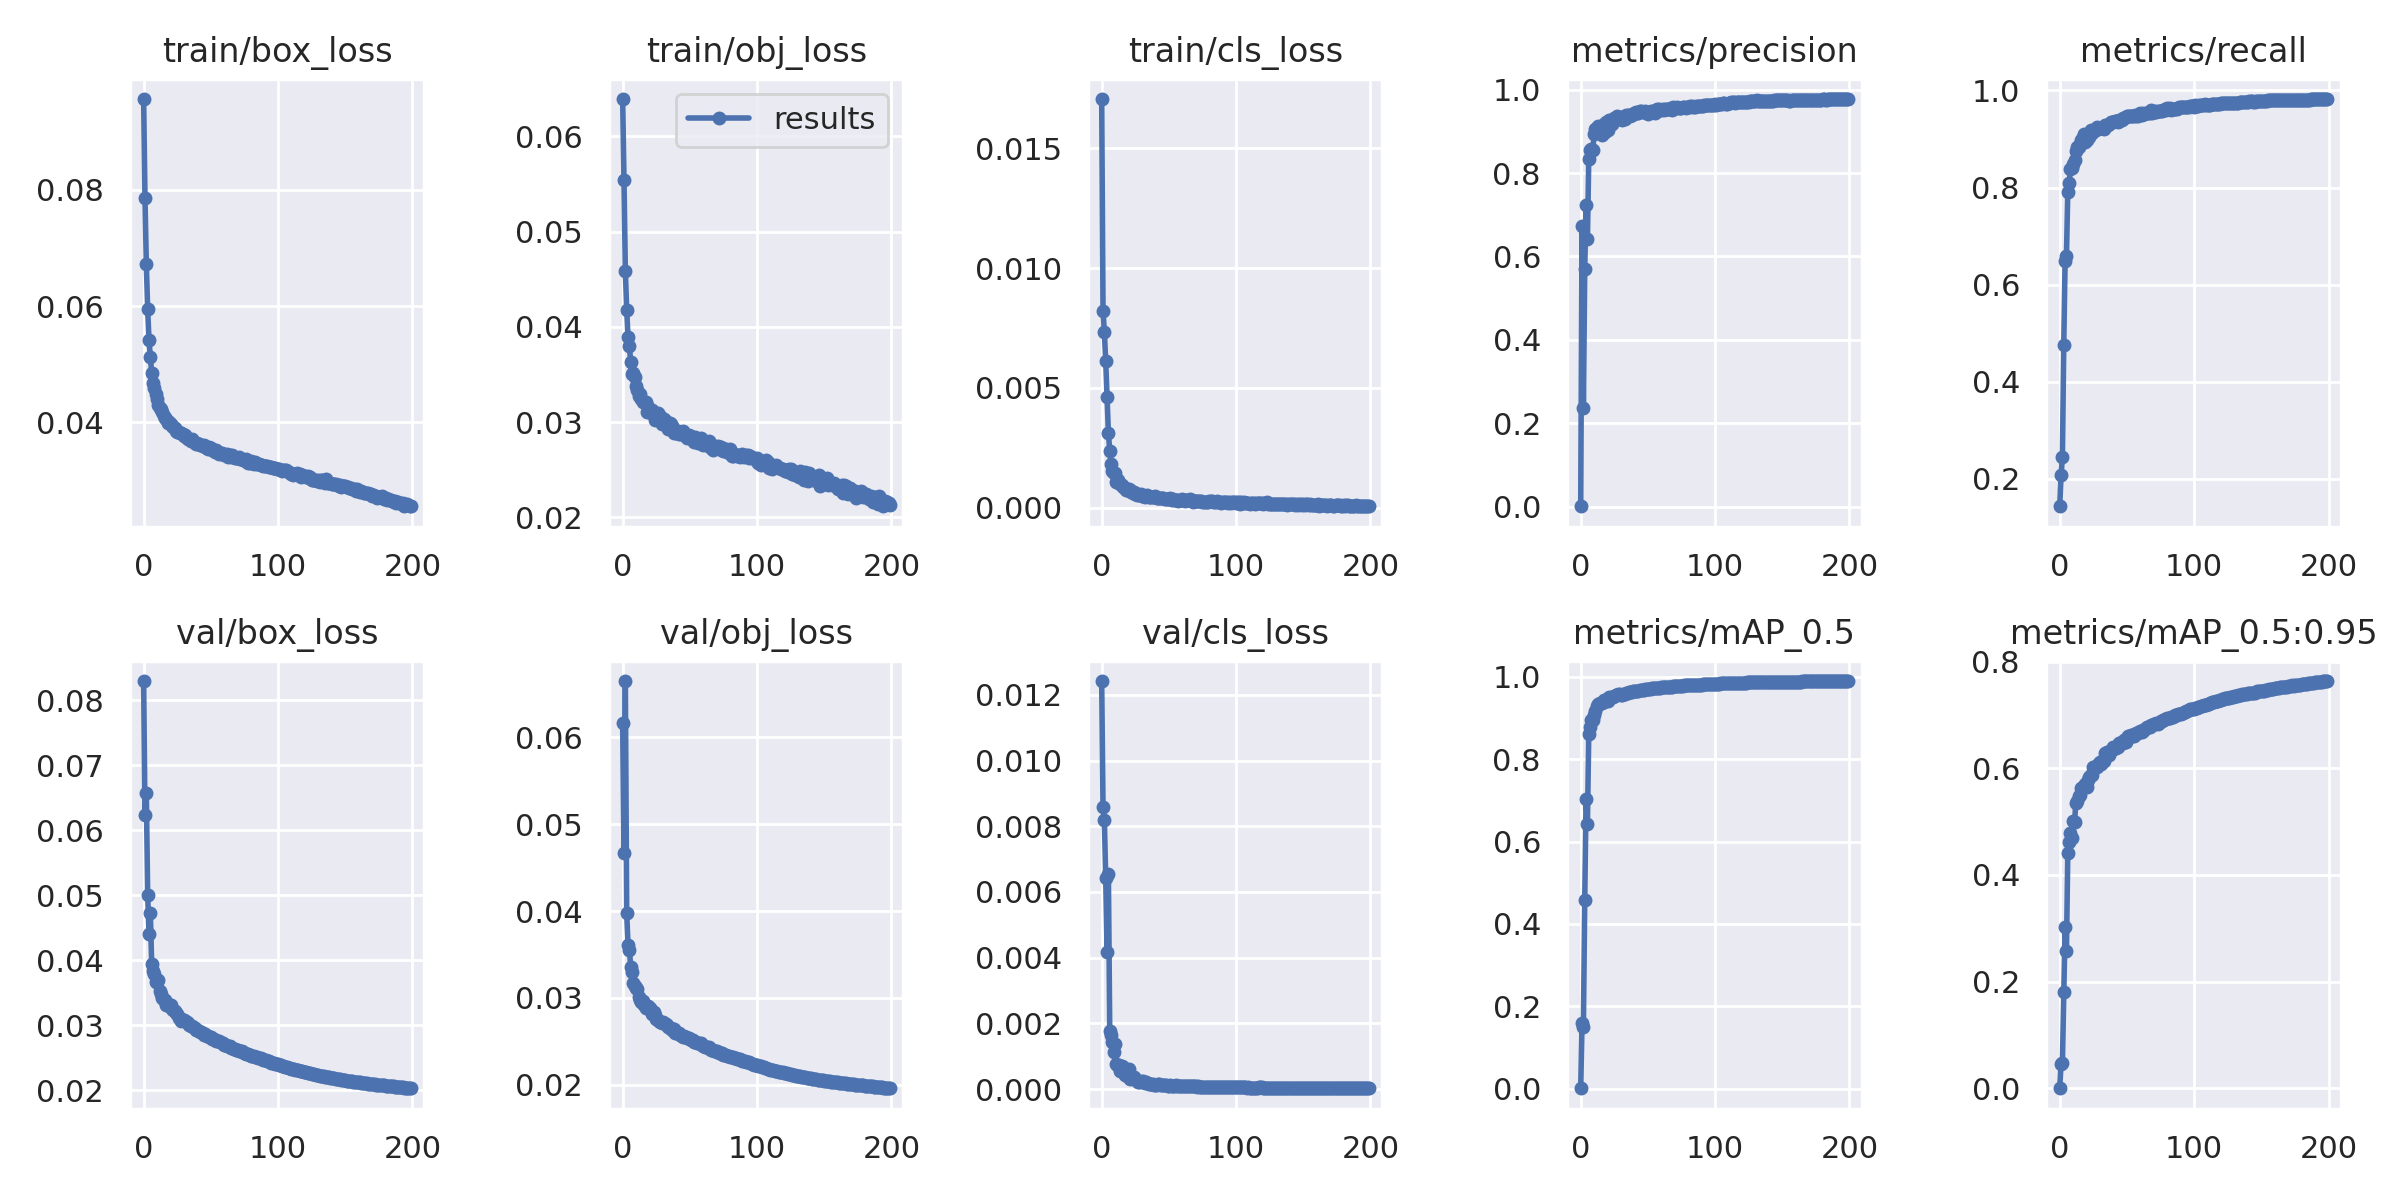

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/train_result/results.png', width=800)

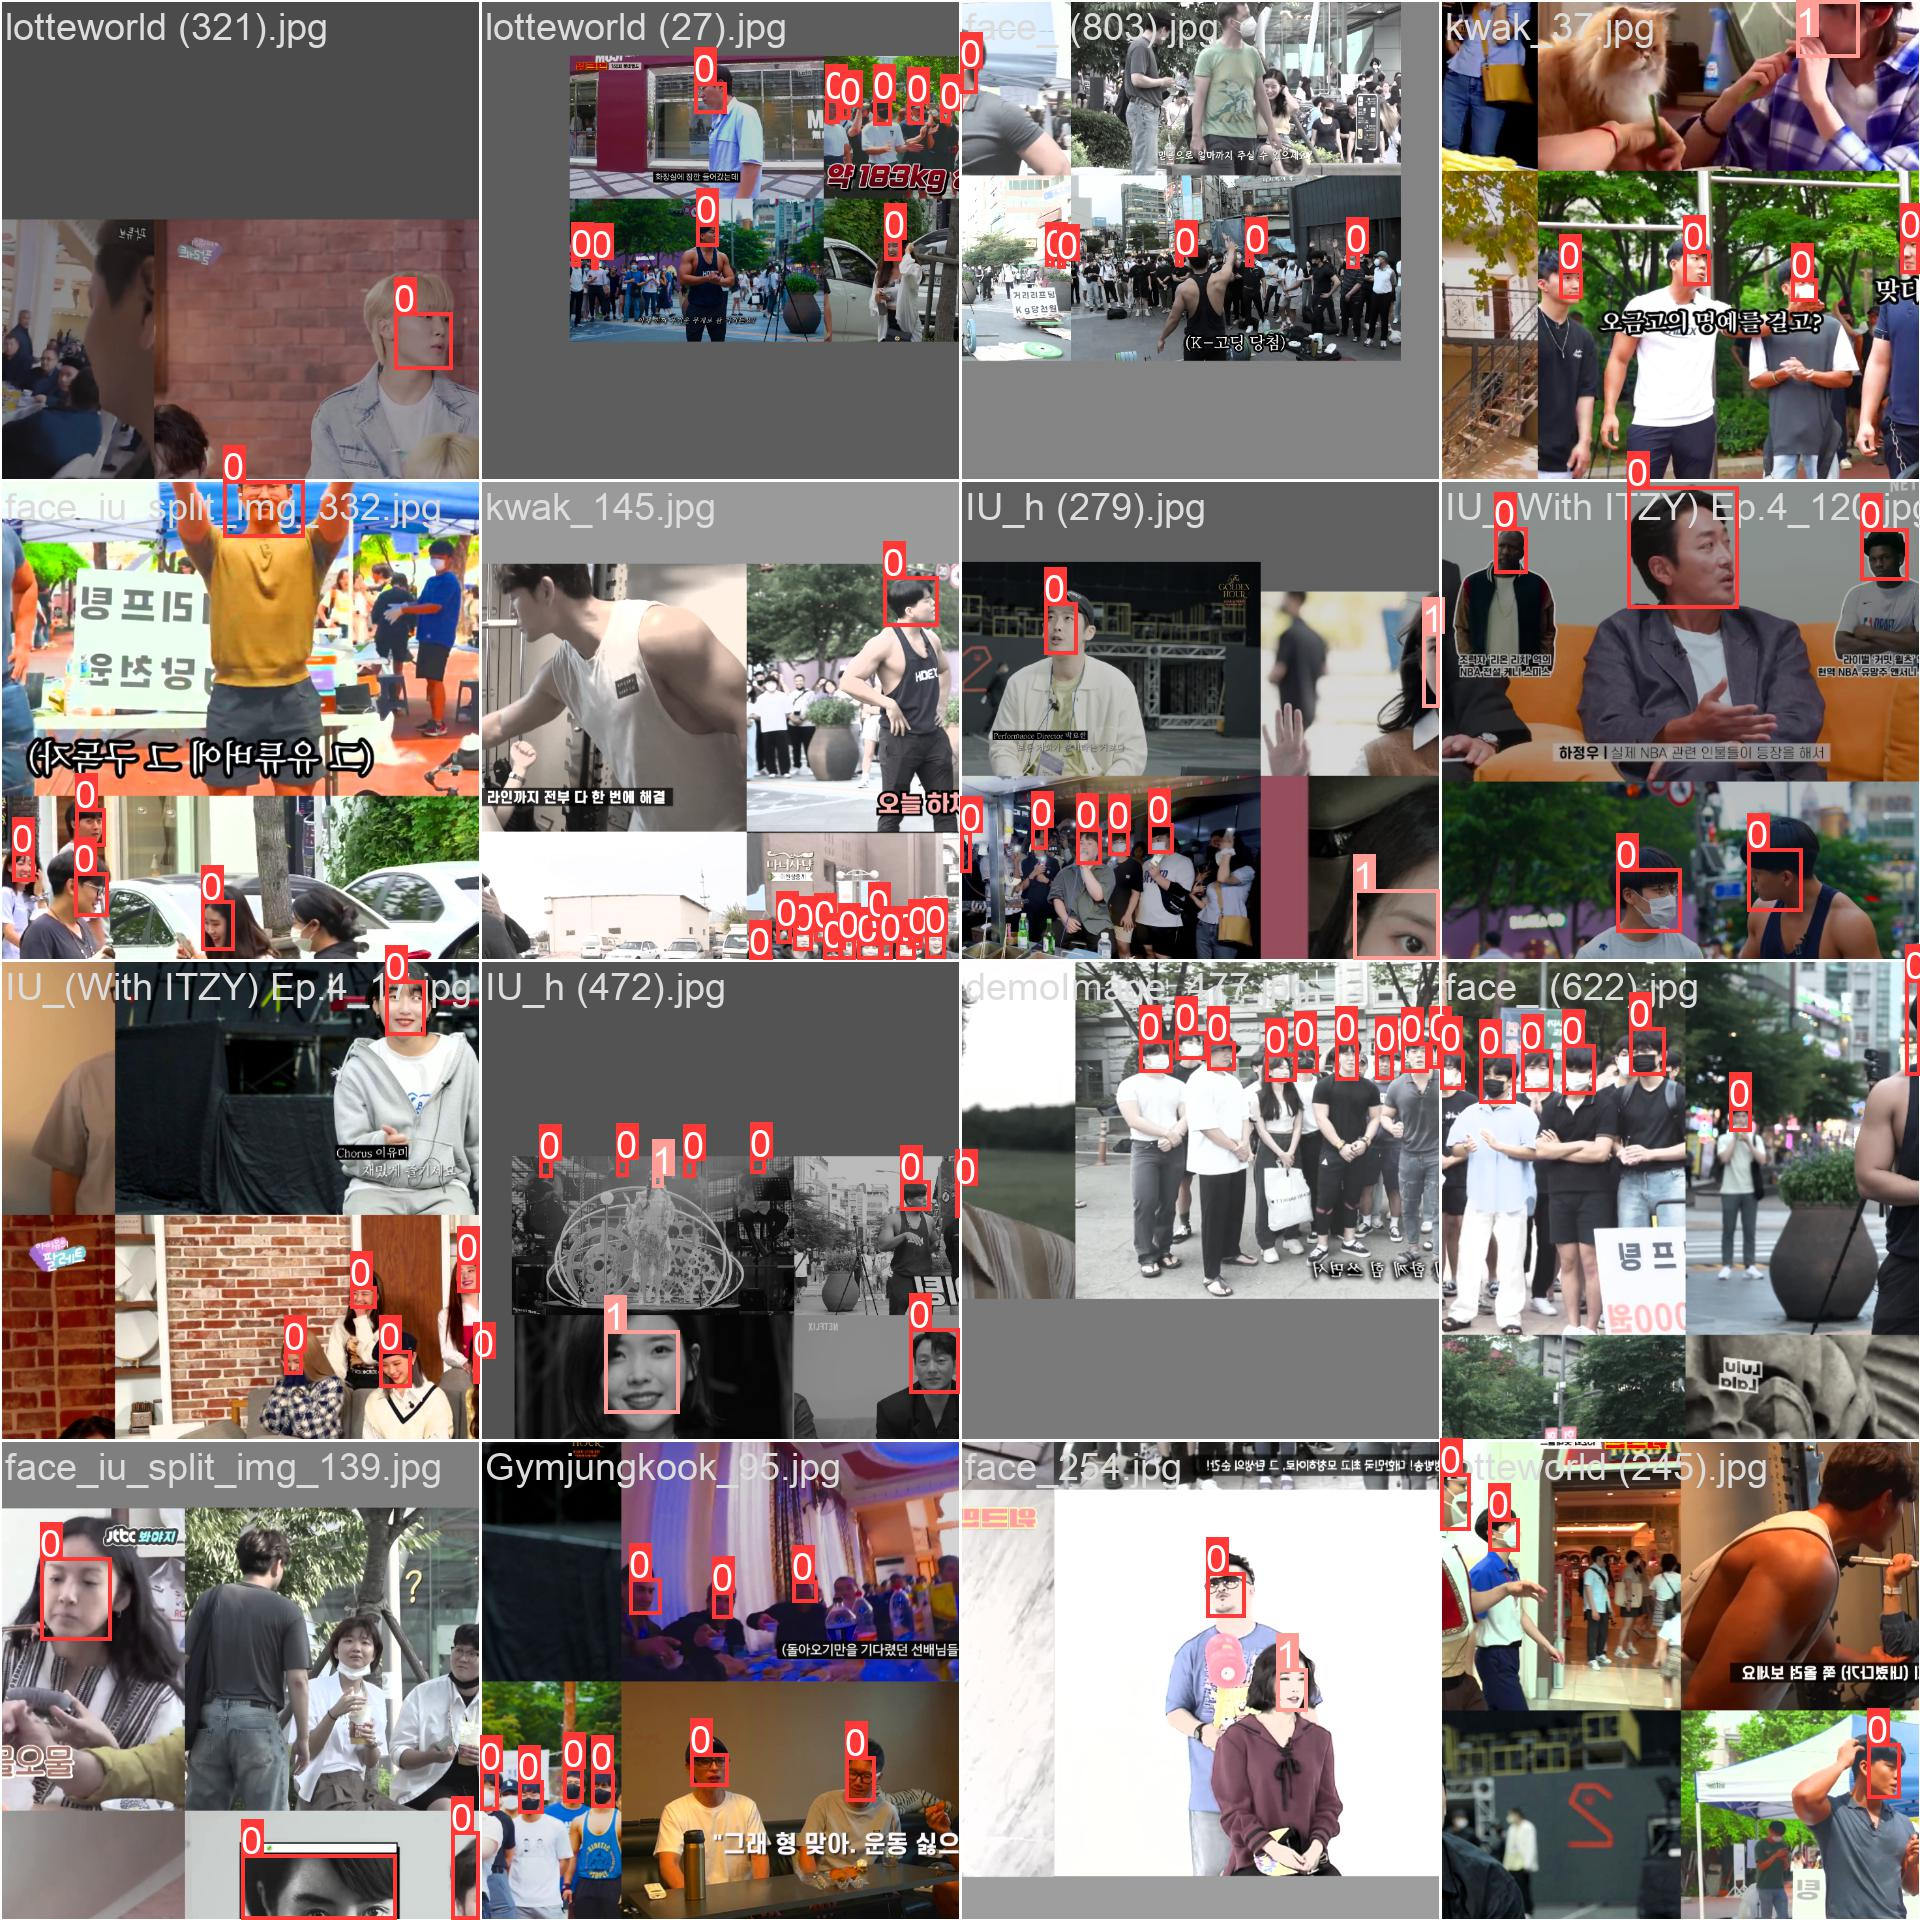

In [ ]:
# 디텍팅 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/train_result/train_batch0.jpg', width=800)

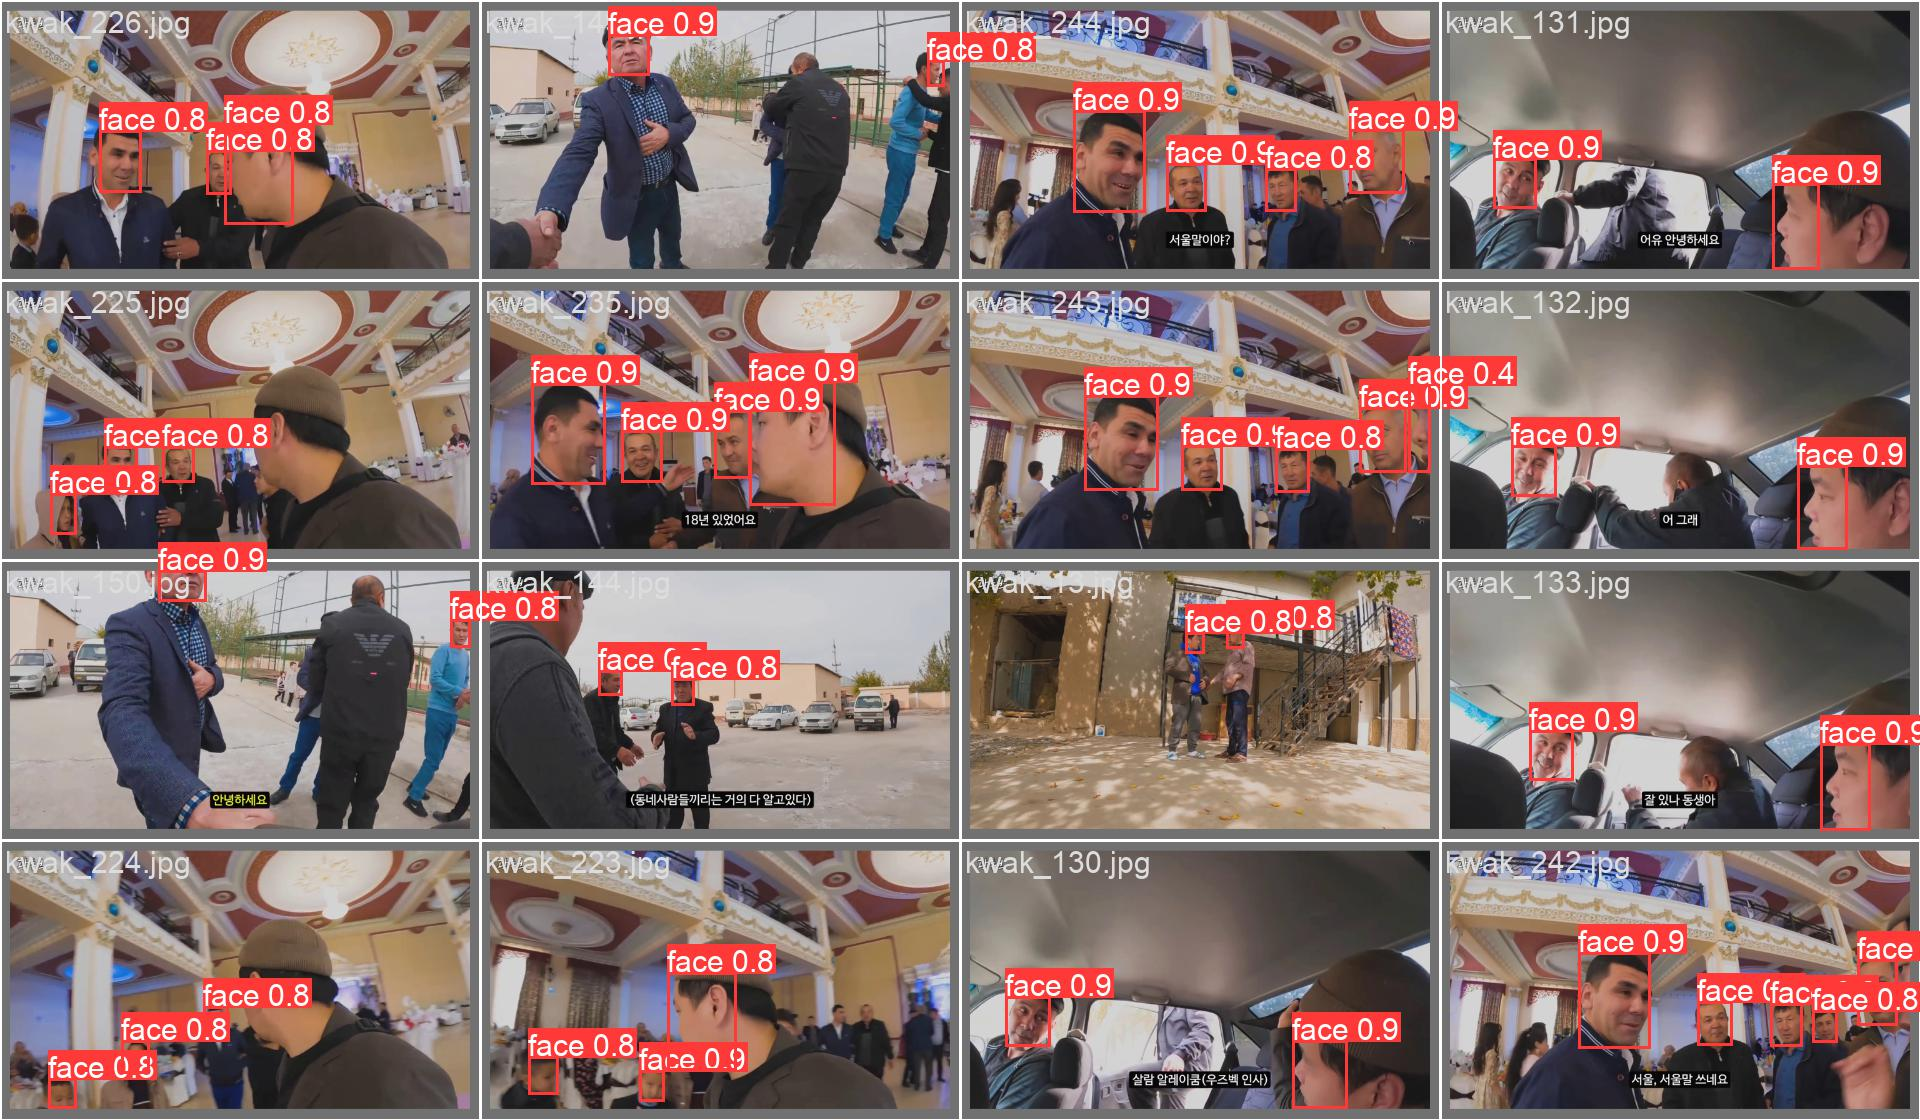

In [ ]:
# 라벨값 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/train_result/val_batch1_pred.jpg', width=800)

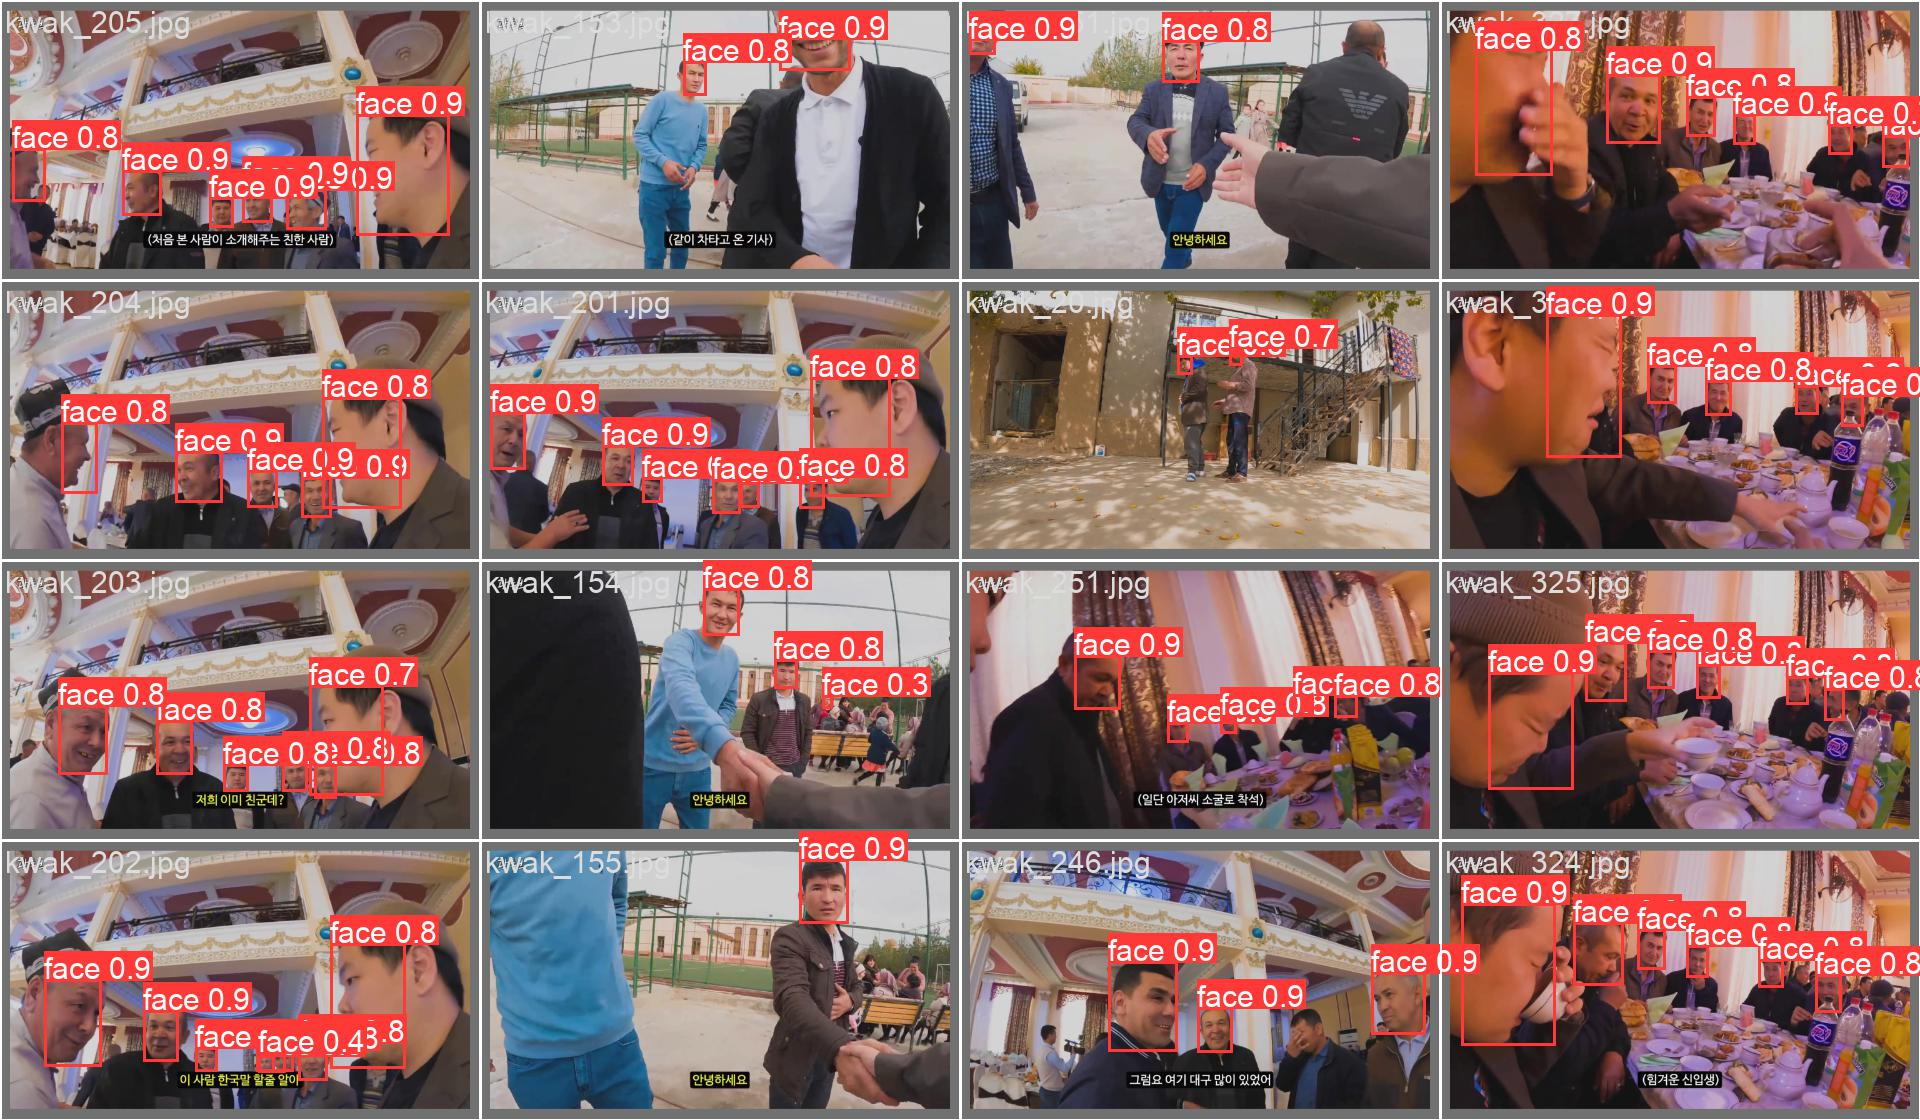

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/train_result/val_batch2_pred.jpg', width=800)

## 테스트

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import cv2
import os

vidcap=cv2.VideoCapture('/content/drive/MyDrive/framework/IUTestVideo.mp4')

cnt=0
os.mkdir('/content/drive/MyDrive/face_project/Traintest')

while(vidcap.isOpened()):
  ret, image = vidcap.read()
  if ret == False:
    break

  if(int(vidcap.get(1)) % 30 == 0): # 10프레임마다 1장씩 저장
    if cnt % 10 ==0:   
      print('Save img number:' + str(int(cnt)))
      
    cv2.imwrite('/content/drive/MyDrive/face_project/IUtest_%d.jpg'%cnt, image)
    cnt+=1

vidcap.release()
#cv2.destroyAllWindows()

Save img number:0
Save img number:10
Save img number:20
Save img number:30
Save img number:40
Save img number:50
Save img number:60
Save img number:70


KeyboardInterrupt: ignored

In [ ]:
!ls /content/drive/MyDrive/framework/yolov5/runs/train/xxx_result4/weights/

best.pt  last.pt


In [ ]:
!pwd
%cd /content/drive/MyDrive/framework/yolov5

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yolov5


In [5]:
# 가중치 파일 경로 지정
!python detect2.py --source /content/drive/MyDrive/framework/yongmyungssmp4.mp4 --weights /content/drive/MyDrive/framework/yolov5/runs/train/yolov5m_model4/weights/best.pt

detect2: weights=['/content/drive/MyDrive/framework/yolov5/runs/train/yolov5m_model4/weights/best.pt'], source=/content/drive/MyDrive/framework/yongmyungssmp4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
custom_YOLOv5m summary: 157 layers, 7015519 parameters, 0 gradients
video 1/1 (1/3254) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yongmyungssmp4.mp4: 384x640 2 faces, 1226.4ms
video 1/1 (2/3254) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/yongmyungssmp4.mp4: 384x640 2 faces, 421

In [ ]:
xywh = [135.0,29.0,159.0,58.0]

In [ ]:
torch.tensor(xywh)

tensor([135.,  29., 159.,  58.])

In [ ]:
x = xywh[0]
y = xywh[1]
w = xywh[2]
h = xywh[3]
print(x,y,w,h)

135.0 29.0 159.0 58.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 가중치 파일 경로 지정
!python detect2.py --weights /content/drive/MyDrive/framework/yolov5/runs/train/yolov5m_model4/weights/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/framework/TestVideo_Basic/YongMyungTestVideo.mp4

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (200/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/TestVideo_Basic/YongMyungTestVideo.mp4: 384x640 1 face, 1 yong, 274.4ms
video 1/1 (201/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/TestVideo_Basic/YongMyungTestVideo.mp4: 384x640 1 face, 1 yong, 253.7ms
video 1/1 (202/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/TestVideo_Basic/YongMyungTestVideo.mp4: 384x640 1 face, 1 yong, 248.9ms
video 1/1 (203/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/TestVideo_Basic/YongMyungTestVideo.mp4: 384x640 1 face, 1 yong, 256.2ms
video 1/1 (204/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/TestVideo_Basic/YongMyungTestVideo.mp4: 384x640 1 face, 1 yong, 251.9ms
video 1/1 (205/5197) /content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFV

In [ ]:
import random
from glob import glob

image_name = random.choice(glob('/content/drive/MyDrive/trash/yolov5/runs/detect/exp5/*jpg'))
Image(filename=image_name,width=800)

In [ ]:
shutil.copy('/content/drive/MyDrive/trash/yolov5/runs/detect/exp3/test.mp4', 
            '/content/drive/MyDrive/trash')

'/content/drive/MyDrive/trash/test.mp4'

In [ ]:
!pwd
%cd /content/drive/MyDrive/framework/xxx

/content
/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx


In [ ]:
#!git clone https://github.com/glennford49/Facenet_Tensorflow.git

Cloning into 'Facenet_Tensorflow'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/

/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow


In [ ]:
#!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/data_preprocess.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/data_preprocess.py", line 1, in <module>
    from preprocess import preprocesses
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 859, in get_code
  File "<frozen importlib._bootstrap_external>", line 917, in get_data
KeyboardInterrupt


In [ ]:
!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/train_main.py

Training Start
2022-10-06 01:17:38.554108: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
[0 2]
Classes: 3
Images: 584
Model filename: ./model/20180402-114759.pb
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.gfile.GFile.
Extracting features of images for model
Traceback (most recent call last):
  File "/content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/train_main.py", line 13, in <module>
    get_file=obj.main_train()
  File "/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/classifier.py", line 44, in main_train
    images = facenet.load_data(paths_batch, False, False, image_size)
  File "/content/drive/.shortcut-targets-by-id/1_cts6OqJRy7uzehTSw7NkFVKIcT3T0er/framework/xxx/Facenet_Tensorflow/facenet.py", line 259, in load_data
    img = imageio.imread(image_paths[i])
  File "/usr/local/lib/python3.7/dist

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

In [ ]:
!python /content/drive/MyDrive/framework/xxx/Facenet_Tensorflow/face_recognition.py

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Predictions : [ name: IU , accuracy: 1.000 ]
Predictions : [ name: IU , accuracy: 1.000 ]
Predictions : [ name: IU , accuracy: 0.998 ]
Predictions : [ name: IU , accuracy: 0.997 ]
Predictions : [ name: IU , accuracy: 0.964 ]
Predictions : [ name: IU , accuracy: 0.947 ]
Predictions : [ name: IU , accuracy: 0.998 ]
Predictions : [ name: IU , accuracy: 0.999 ]
Predictions : [ name: IU , accuracy: 0.948 ]
Predictions : [ name: IU , accuracy: 0.997 ]
Predictions : [ name: IU , accuracy: 0.976 ]
Predictions : [ name: IU , accuracy: 0.992 ]
Predictions : [ name: IU , accuracy: 0.941 ]
Predictions : [ name: IU , accuracy: 0.996 ]
Predictions : [ name: IU , accuracy: 0.949 ]
Predictions : [ name: IU , accuracy: 0.997 ]
Predictions : [ name: IU , accuracy: 0.980 ]
Predictions : [ name: IU , accuracy: 0.996 ]
Predictions : [ name: IU , accuracy: 0.997 ]
Predictions : [ name: IU , accuracy: 0.999 ]
Predictions : [ name: IU , accuracy: 0.996 ]
Predictions : [ nam

In [ ]:
import time
print(time.localtime(time.time()))



time.struct_time(tm_year=2022, tm_mon=10, tm_mday=6, tm_hour=1, tm_min=43, tm_sec=10, tm_wday=3, tm_yday=279, tm_isdst=0)


In [ ]:
from pytz import timezone
from datetime import datetime
today = datetime.now(timezone('Asia/Seoul'))
print(today)
dt_string = today.strftime('%m월/%d일/%H시%M분 완료')
print(dt_string)

2022-10-06 10:51:09.047405+09:00
10월/06일/10시51분 완료


In [ ]:
filename = f'{dt_string}.avi'

In [ ]:
print(filename)

10월/06일/10시51분 완료.avi
